___
## What is the variation in traffic week by week during the summer months?

In [1]:
# This reads in the cleaned data file and creates a heatmap 
# of the foot traffic at top MTA stations by week.

### 1. Import packages and libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# allow render in Jupyter notebook
%matplotlib inline

# configure format of images
%config InlineBackend.figure_format = 'svg'
sns.set(font_scale=0.8)

### 2. Group and sort data

In [3]:
# read cleaned data into data frame
df = pd.read_csv('output_stage2.csv', parse_dates=['DATETIME'])
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF
0,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00,90.0,294.0
1,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00,89.0,321.0
2,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00,546.0,1039.0
3,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00,741.0,1288.0
4,H007,R248,00-00-00,1 AV,L,BMT,04/28/2018,20:00:00,REGULAR,13472316,15073470,2018-04-28 20:00:00,693.0,1560.0


In [4]:
# add useful columns and define data types
df['TOTAL'] = df['ENTRY_DIFF'] + df['EXIT_DIFF']
df['DATE'] = pd.to_datetime(df['DATE'])
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATETIME,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,H007,R248,00-00-00,1 AV,L,BMT,2018-04-28,04:00:00,REGULAR,13470247,15069262,2018-04-28 04:00:00,90.0,294.0,384.0
1,H007,R248,00-00-00,1 AV,L,BMT,2018-04-28,08:00:00,REGULAR,13470336,15069583,2018-04-28 08:00:00,89.0,321.0,410.0
2,H007,R248,00-00-00,1 AV,L,BMT,2018-04-28,12:00:00,REGULAR,13470882,15070622,2018-04-28 12:00:00,546.0,1039.0,1585.0
3,H007,R248,00-00-00,1 AV,L,BMT,2018-04-28,16:00:00,REGULAR,13471623,15071910,2018-04-28 16:00:00,741.0,1288.0,2029.0
4,H007,R248,00-00-00,1 AV,L,BMT,2018-04-28,20:00:00,REGULAR,13472316,15073470,2018-04-28 20:00:00,693.0,1560.0,2253.0


In [5]:
# prepare dataframe to be filtered by station
df = df.groupby(['STATION', 'DATE']).sum().reset_index()
df.head()

,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,1 AV,2018-04-28,15183306607,8122571450,15791.0,18077.0,33868.0
1,1 AV,2018-04-29,18220076225,9747209641,16931.0,19414.0,36345.0
2,1 AV,2018-04-30,18220178781,9747329628,21267.0,24012.0,45279.0
3,1 AV,2018-05-01,18139941256,9693792193,21741.0,23271.0,45012.0
4,1 AV,2018-05-02,18214473413,9747118933,22827.0,24790.0,47617.0


In [6]:
# top stations are hardcoded but ideally, a list would be read in.
stations_list = [
    '34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '23 ST',
    '14 ST-UNION SQ', 'TIMES SQ-42 ST', 'FULTON ST', '86 ST',
    '42 ST-PORT AUTH', '59 ST COLUMBUS',
]

In [7]:
# match station names in dataframe to elements in the stations list
df2 = df.loc[df['STATION'].isin(stations_list)].reset_index()
df2.head()

,index,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL
0,1272,14 ST-UNION SQ,2018-04-28,3229543238,1287635022,64618.0,62879.0,127497.0
1,1273,14 ST-UNION SQ,2018-04-29,4290614206,1670913938,61415.0,53190.0,114605.0
2,1274,14 ST-UNION SQ,2018-04-30,4222796361,1662131735,99979.0,88515.0,188494.0
3,1275,14 ST-UNION SQ,2018-05-01,4230687629,1660962310,109976.0,93499.0,203475.0
4,1276,14 ST-UNION SQ,2018-05-02,4293884851,1677193974,114281.0,94972.0,209253.0


In [8]:
# convert dates to week number in the year
df2['WEEK_OF_YEAR'] = df['DATE'].dt.week
df2.head()

,index,STATION,DATE,ENTRIES,EXITS,ENTRY_DIFF,EXIT_DIFF,TOTAL,WEEK_OF_YEAR
0,1272,14 ST-UNION SQ,2018-04-28,3229543238,1287635022,64618.0,62879.0,127497.0,17
1,1273,14 ST-UNION SQ,2018-04-29,4290614206,1670913938,61415.0,53190.0,114605.0,17
2,1274,14 ST-UNION SQ,2018-04-30,4222796361,1662131735,99979.0,88515.0,188494.0,18
3,1275,14 ST-UNION SQ,2018-05-01,4230687629,1660962310,109976.0,93499.0,203475.0,18
4,1276,14 ST-UNION SQ,2018-05-02,4293884851,1677193974,114281.0,94972.0,209253.0,18


### 3. Visualize data

In [9]:
# create data frame for visualization
df_viz = (df2[['STATION','WEEK_OF_YEAR','TOTAL']]
          .groupby(['STATION','WEEK_OF_YEAR'])[['TOTAL']]
          .mean())

df_viz = df_viz.reset_index()
df_viz['TOTAL']= df_viz['TOTAL']/1000
df_viz.head()

,STATION,WEEK_OF_YEAR,TOTAL
0,14 ST-UNION SQ,17,121.051000
1,14 ST-UNION SQ,18,184.869143
2,14 ST-UNION SQ,19,180.359429
3,14 ST-UNION SQ,20,180.497429
4,14 ST-UNION SQ,21,173.727857


In [10]:
# stage data in a pivot table for seaborn heatmap
df_viz = pd.pivot_table(
    data=df_viz,
    index='STATION',
    values='TOTAL',
    columns='WEEK_OF_YEAR',
)

df_viz.head()

WEEK_OF_YEAR,17,18,19,20,21,22,23,24,25,26,27,28,29,30
STATION,,,,,,,,,,,,,,
14 ST-UNION SQ,121.0510,184.869143,180.359429,180.497429,173.727857,169.005714,180.525286,179.455000,182.090143,168.973143,143.818857,172.221571,170.054000,189.8974
23 ST,90.7990,177.245429,170.917286,175.116429,159.706571,139.478571,164.245143,161.136571,167.106857,159.823714,120.822571,154.447857,160.978571,170.7288
34 ST-HERALD SQ,109.4230,195.142571,193.550000,184.508429,181.084429,164.138714,183.744000,192.155714,193.281571,189.227571,155.728286,183.398429,185.428571,224.6240
34 ST-PENN STA,137.7390,266.333143,269.062571,274.781000,263.821000,246.411143,269.367143,267.813714,272.837286,272.367714,223.485571,263.008714,264.517571,309.2970
42 ST-PORT AUTH,102.1595,148.009286,145.884429,149.790571,145.759429,137.954429,145.608714,143.974571,144.983714,145.339857,129.768571,145.162857,145.036857,164.1928


In [11]:
# change week numbers to month for better comprehension
x_labels = [
    'April','May','May','May','May',
    'June','June','June','June','June',
    'July','July','July','July',
]

df_viz.columns = x_labels
df_viz.head()

,April,May,May,May,May,June,June,June,June,June,July,July,July,July
STATION,,,,,,,,,,,,,,
14 ST-UNION SQ,121.0510,184.869143,180.359429,180.497429,173.727857,169.005714,180.525286,179.455000,182.090143,168.973143,143.818857,172.221571,170.054000,189.8974
23 ST,90.7990,177.245429,170.917286,175.116429,159.706571,139.478571,164.245143,161.136571,167.106857,159.823714,120.822571,154.447857,160.978571,170.7288
34 ST-HERALD SQ,109.4230,195.142571,193.550000,184.508429,181.084429,164.138714,183.744000,192.155714,193.281571,189.227571,155.728286,183.398429,185.428571,224.6240
34 ST-PENN STA,137.7390,266.333143,269.062571,274.781000,263.821000,246.411143,269.367143,267.813714,272.837286,272.367714,223.485571,263.008714,264.517571,309.2970
42 ST-PORT AUTH,102.1595,148.009286,145.884429,149.790571,145.759429,137.954429,145.608714,143.974571,144.983714,145.339857,129.768571,145.162857,145.036857,164.1928


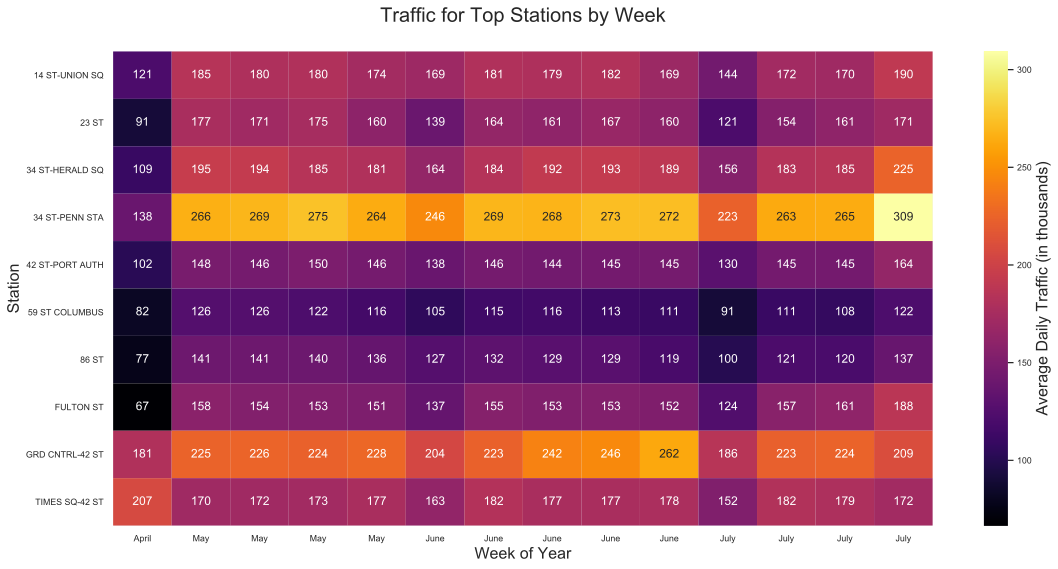

In [13]:
# render heatmap
plt.figure(figsize=(16,8))
ax = plt.axes()

sns.heatmap(
    df_viz,
    fmt=".0f",
    cmap='inferno',
    annot=True,
    annot_kws={"size": 12},
    cbar_kws={'label': "Average Daily Traffic (in thousands)"},
    ax = ax
)

# configure axes and labels
ax.set_title('Traffic for Top Stations by Week', fontsize=20)
ax.title.set_position([.5, 1.05])
plt.xlabel('Week of Year', fontsize=16)
plt.ylabel('Station', fontsize=16);
ax.figure.axes[-1].yaxis.label.set_size(16)

# format and output figure
plt.tight_layout()
plt.savefig('heatmap_fig_final.pdf', transparent=True);

____